In [5]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
andmestik = None

# Avab järjest kõik failid algkaustas
for file in [f for f in os.listdir("etnc19_web_2019_andmed/")]:
    filename = os.path.join("etnc19_web_2019_andmed/", file)
    with open(filename, "r", encoding = "utf-8") as fr:
        andmed = json.load(fr)
        
        if andmestik is None:
            andmestik = pd.DataFrame.from_dict([andmed])
        else:
            andmestik = andmestik.append(pd.DataFrame.from_dict([andmed]), ignore_index=True)

In [22]:
andmestik

,TTR,asesõnade_esimese_isiku_osaarv,asesõnade_kolmanda_isiku_osaarv,asesõnade_teise_isiku_osaarv,emotikonide_arv,kaudse_kõneviisi_osakaal,kirjavigadega_osaarv,kokkukleepunud_kirjavahemärkide_arv,korduvate_juppide_arv,korduvate_sõnade_arv,...,lemmapikkuse_osaarv,luhemate_tundmatute_osakaal,läbinisti_suur,nud-partitsiibiga_verbide_osakaal,passiivi_osakaal,puuduva_suure_algustähega,tajuverbide_osaarv,verbide_esimese_isiku_osaarv,verbide_kolmanda_isiku_osaarv,verbide_teise_isiku_osaarv
0,0.277535,0.643836,0.150685,0.205479,1,0.000000,0.005927,14,0,5,...,4.433595,0.000000,0.028911,0.047486,0.033520,0.001188,0.179775,0.389831,0.364407,0.245763
1,0.812500,1.000000,0.000000,0.000000,0,0.000000,0.020408,0,0,0,...,5.219780,0.000000,0.025000,0.125000,0.187500,0.000000,0.111111,0.500000,0.500000,0.000000
2,0.551887,0.250000,0.187500,0.562500,0,0.000000,0.000000,0,0,1,...,4.781737,0.000000,0.025882,0.033113,0.039735,0.002353,0.123810,0.040000,0.420000,0.540000
3,0.841463,0.666667,0.000000,0.333333,0,0.000000,0.021505,0,0,0,...,5.029412,0.000000,0.060976,0.000000,0.095238,0.000000,0.000000,0.333333,0.666667,0.000000
4,0.754545,-1.000000,-1.000000,-1.000000,1,0.000000,0.039062,1,0,0,...,4.709677,0.000000,0.127273,0.055556,0.277778,0.045455,0.200000,0.000000,0.666667,0.333333
5,0.578595,0.937500,0.062500,0.000000,0,0.000000,0.002755,2,0,0,...,4.280864,0.000000,0.000000,0.129032,0.021505,0.000000,0.220588,0.634146,0.243902,0.121951
6,0.697917,1.000000,0.000000,0.000000,1,0.035088,0.012712,1,0,0,...,4.495192,0.000000,0.000000,0.035088,0.052632,0.000000,0.181818,0.285714,0.500000,0.214286
7,0.736000,0.142857,0.857143,0.000000,0,0.000000,0.020000,1,0,0,...,4.139706,0.000000,0.000000,0.083333,0.000000,0.008000,0.160000,0.076923,0.846154,0.076923
8,0.563131,0.800000,0.200000,0.000000,6,0.000000,0.008147,3,0,0,...,4.487179,0.000000,0.027431,0.027027,0.036036,0.004988,0.172840,0.454545,0.409091,0.136364
9,0.568690,0.777778,0.111111,0.111111,0,0.000000,0.038889,0,0,1,...,4.409091,0.000000,0.041534,0.022989,0.022989,0.000000,0.208955,0.352941,0.558824,0.088235


In [62]:
for tunnus in andmestik:

    andmed = andmestik.loc[andmestik[tunnus] != -1][tunnus].sort_values()
    
    plt.hist(andmed, bins = 500)
    
    plt.rcParams["figure.figsize"] = (20,10)
    
    #plt.xticks([x * 0.1 for x in range(10)])
    
    plt.title("Alamkorpuse " + tunnus)
    
    keskmine = andmed.mean()
    
    plt.axvline(keskmine, color='red', linestyle='dashed', linewidth=1)
    
    min_ylim, max_ylim = plt.ylim()
    plt.text(keskmine, max_ylim*1.01, 'Mean: {:.2f}'.format(keskmine), color='red')
    
    plt.savefig('Graafid/{}.png'.format(tunnus), bbox_inches='tight')
    
    plt.close()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B0B151CF8>,
      dtype=object)

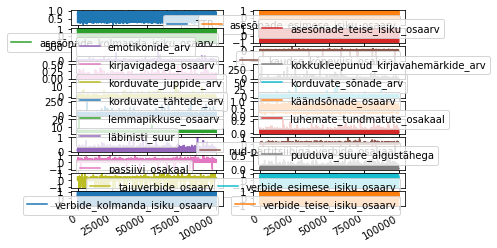

In [11]:
andmestik.plot(subplots=True, layout=(11, 2))

Temp

In [24]:
andmestik.to_excel("informatsioon.xlsx")

In [ ]:
# Keskmistest varieerimise arvutamine
andmed["TTR_varieerumine"] = meta_info["TTR"] - keskmised['TTR']
andmed["käändsõnade_varieerumine"] = meta_info["käänduvate_lemmade_osaarv"] - keskmised['käänduvate_lemmade_osaarv']
andmed["lemmapikkuse_varieerumine"] = meta_info["keskmine_lemma_pikkus"] - keskmised['keskmine_lemma_pikkus']